# PROJECT PART B : BASKETBALL OUTCOME PREDICTION PROJECT 

This project aims to predict the outcome of basketball games given the statistics of two teams. The prediction is based on various metrics such as field goals, free throws, 3 points, rebounds, and assists.

# Import libraries

In [19]:
!pip install catboost
!pip install xgboost


# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


# Reading the dataset 

In [20]:
def read_file(filename):
    df = pd.read_csv('/Users/macbook/Downloads/databasebasketball/' + filename)
    return df

# Load the data
dataframe = read_file('team_season.csv')

# Data loading

In [21]:
# Renaming of columns
dataframe.rename(
    columns={"team" : "Team", "o_fgm" : "FGM", "o_fga" : "FGA", "o_ftm" : "FTM", "o_fta" : "FTA", "o_oreb" : "OReb", "o_dreb" : "DReb",
       "o_reb" : "TReb", "o_asts" : "AST", "o_pf" : "PF", "o_stl" : "STL", "o_to" : "TO", "o_blk" : "BLK", "o_3pm" : "3PM", "o_3pa" : "3PA",
       "o_pts" : "PTS", "d_fgm" : "O_FGM", "d_fga" : "O_FGA", "d_ftm" : "O_FTM", "d_fta" : "O_FTA", "d_oreb" : "O_OReb", "d_dreb" : "O_DReb", 
       "d_reb" : "O_TReb", "d_asts" : "O_AST", "d_pf" : "O_PF", "d_stl" : "O_STL", "d_to" : "O_TO", "d_blk" : "O_BLK", "d_3pm" : "O_3PM",
       "d_3pa" : "O_3PA", "d_pts" : "O_PTS"}, inplace=True)


# Further metrics calculated to help build a stronger model

# Field Goal Percentage = Field Goal / Field Goal Attempted
dataframe["FG%"] = dataframe["FGM"] / dataframe["FGA"]
dataframe["FG%"] = dataframe["FG%"].fillna(0)

dataframe["O_FG%"] = dataframe["O_FGM"] / dataframe["O_FGA"]
dataframe["O_FG%"] = dataframe["O_FG%"].fillna(0)
# Free Throw Percentage = Free Throw / Free Throw Attempted
dataframe["FT%"] = dataframe["FTM"] / dataframe["FTA"]
dataframe["FT%"] = dataframe["FT%"].fillna(0)

dataframe["O_FT%"] = dataframe["O_FTM"] / dataframe["O_FTA"]
dataframe["O_FT%"] = dataframe["O_FT%"].fillna(0)

# 3- Point Field Goal Percentage = 3-Point Field Goal / 3-Point Field Goal Attempted
dataframe["3P%"] = dataframe["3PM"] / dataframe["3PA"]
dataframe["3P%"] = dataframe["3P%"].fillna(0)

dataframe["O_3P%"] = dataframe["O_3PM"] / dataframe["O_3PA"]
dataframe["O_3P%"] = dataframe["O_3P%"].fillna(0)

# Free Throw Rate = Free Throw / Field Goal Attempted
dataframe["FTr"] = dataframe["FTM"] / dataframe["FGA"]
dataframe["FTr"] = dataframe["FTr"].fillna(0)

# Turnover Percentage = Turnover / ((0.44 * Field Goal Attempted) + Turnover)
dataframe["TO%"] = dataframe["TO"] / (dataframe["FGA"] + (0.44 * dataframe["FTA"]) + dataframe["TO"])
dataframe["TO%"] = dataframe["TO%"].fillna(0)

dataframe["O_TO%"] = dataframe["O_TO"] / (dataframe["O_FGA"] + (0.44 * dataframe["O_FTA"]) + dataframe["O_TO"])
dataframe["O_TO%"] = dataframe["O_TO%"].fillna(0)

# Offensive Rebound Percentage = Offensive Rebound / (Offensive Rebound + Defensive Rebound)
dataframe["OReb%"] = dataframe["OReb"] / (dataframe["OReb"] + dataframe["DReb"])
dataframe["OReb%"] = dataframe["OReb%"].fillna(0)

# Effective Field Goal Percentage = (Field Goal + (0.5 * 3-Point Field Goal)) / Field Goal Attempted
dataframe["eFG%"] = (dataframe["FGM"] + (0.5 * dataframe["3PM"])) / dataframe["FGA"]
dataframe["eFG%"] = dataframe["eFG%"].fillna(0)

dataframe["O_eFG%"] = (dataframe["O_FGM"] + (0.5 * dataframe["O_3PM"])) / dataframe["O_FGA"]
dataframe["O_eFG%"] = dataframe["O_eFG%"].fillna(0)

dataframe.drop(columns=["year", "leag"], inplace=True)

dataframe.head()

,Team,FGM,FGA,FTM,FTA,OReb,DReb,TReb,AST,PF,...,FT%,O_FT%,3P%,O_3P%,FTr,TO%,O_TO%,OReb%,eFG%,O_eFG%
0,BOS,1397,5133,811,1375,0,0,0,470,1202,...,0.589818,0.0,0.0,0.0,0.157997,0.0,0.0,0.0,0.272161,0.0
1,CH1,1879,6309,939,1550,0,0,0,436,1473,...,0.605806,0.0,0.0,0.0,0.148835,0.0,0.0,0.0,0.297828,0.0
2,CL1,1674,5699,903,1428,0,0,0,494,1246,...,0.632353,0.0,0.0,0.0,0.158449,0.0,0.0,0.0,0.293736,0.0
3,DE1,1437,5843,923,1494,0,0,0,482,1351,...,0.617805,0.0,0.0,0.0,0.157967,0.0,0.0,0.0,0.245935,0.0
4,NYK,1465,5255,951,1438,0,0,0,457,1218,...,0.661335,0.0,0.0,0.0,0.180971,0.0,0.0,0.0,0.278782,0.0


# Evaluation Function

In [22]:
# Define function for model evaluation
def evaluate_model(y_pred, y_test, plot=True):
    evs = metrics.explained_variance_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    print("Explained Variance Score:", evs)
    print("Mean Absolute Error:", mae)
    print("Root Mean Squared Error:", rmse)
    print("R2 Score:", r2)
    
    if plot:
        # Plotting actual vs. predicted values
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_test, y=y_pred)
        plt.title('Actual vs. Predicted Values')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')

        # Plot regression line
        sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')

        plt.show()
    
    return evs, mae, rmse, r2


# Model Creation: Win Prediction Model

Feature selection for wining model

In [23]:
# Feature selection for wining model
win_features = ['FGM','FGA','FTM','FTA','TReb','AST','PTS','lost','FT%','eFG%']
win_model_dataframe = dataframe[win_features]
win_model_labels = dataframe['won']
win_model_dataframe.head()

,FGM,FGA,FTM,FTA,TReb,AST,PTS,lost,FT%,eFG%
0,1397,5133,811,1375,0,470,3605,38,0.589818,0.272161
1,1879,6309,939,1550,0,436,4697,22,0.605806,0.297828
2,1674,5699,903,1428,0,494,4251,30,0.632353,0.293736
3,1437,5843,923,1494,0,482,3797,40,0.617805,0.245935
4,1465,5255,951,1438,0,457,3881,27,0.661335,0.278782


In [24]:
# Split the data
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(
    win_model_dataframe, win_model_labels, test_size=0.2, random_state=2
)

# XGBRegressor for predicting wins

Explained Variance Score: 0.9778918507610119
Mean Absolute Error: 0.7381111032822553
Root Mean Squared Error: 1.8684030815785009
R2 Score: 0.977891771198273


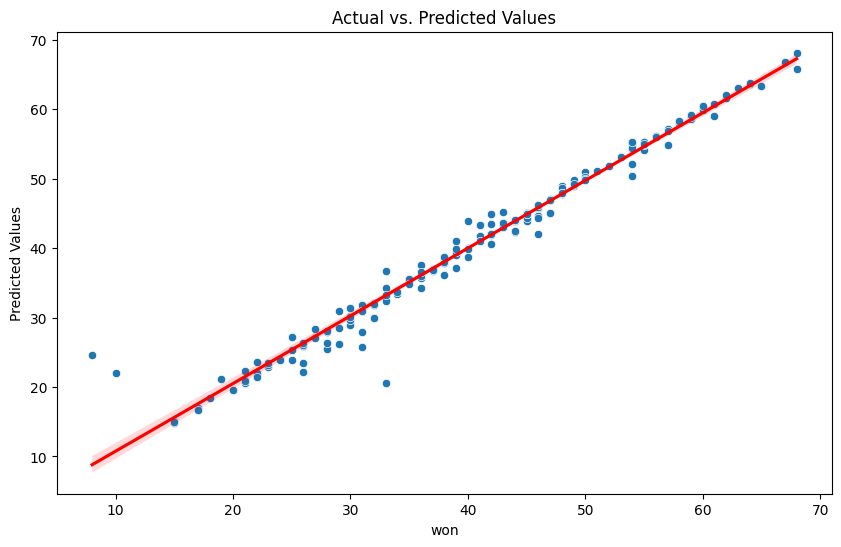

(0.9778918507610119, 0.7381111032822553, 1.8684030815785009, 0.977891771198273)

In [25]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train_win, y_train_win)
pred = model.predict(X_test_win)
evaluate_model(pred, y_test_win)

# Decision Tree Regression for predicting wins

Explained Variance Score: 0.9398799802150938
Mean Absolute Error: 1.0126050420168067
Root Mean Squared Error: 3.0903754089215805
R2 Score: 0.9395167277267751


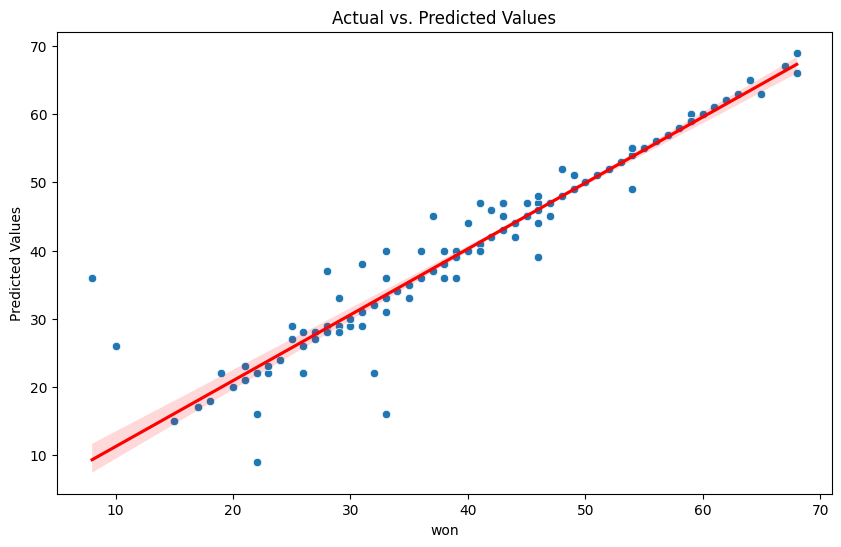

(0.9398799802150938,
 1.0126050420168067,
 3.0903754089215805,
 0.9395167277267751)

In [26]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X_train_win, y_train_win)
pred = model.predict(X_test_win)
evaluate_model(pred, y_test_win)

# Cat Boost Regressor for predicting wins

Learning rate set to 0.040606
0:	learn: 12.1190011	total: 7.18ms	remaining: 7.17s
1:	learn: 11.7315723	total: 13.8ms	remaining: 6.91s
2:	learn: 11.3645220	total: 15.9ms	remaining: 5.29s
3:	learn: 10.9960946	total: 17.3ms	remaining: 4.3s
4:	learn: 10.6768366	total: 18.8ms	remaining: 3.73s
5:	learn: 10.3376215	total: 20.1ms	remaining: 3.33s
6:	learn: 10.0213202	total: 21.5ms	remaining: 3.04s
7:	learn: 9.7290371	total: 22.8ms	remaining: 2.82s
8:	learn: 9.4603581	total: 24.1ms	remaining: 2.65s
9:	learn: 9.1908912	total: 25.2ms	remaining: 2.5s
10:	learn: 8.9232879	total: 26.4ms	remaining: 2.38s
11:	learn: 8.6740113	total: 28ms	remaining: 2.31s
12:	learn: 8.4211333	total: 30ms	remaining: 2.28s
13:	learn: 8.2166038	total: 31.2ms	remaining: 2.2s
14:	learn: 7.9661071	total: 32.7ms	remaining: 2.14s
15:	learn: 7.7365184	total: 33.9ms	remaining: 2.09s
16:	learn: 7.5314123	total: 35.2ms	remaining: 2.04s
17:	learn: 7.3085844	total: 36.4ms	remaining: 1.99s
18:	learn: 7.1080314	total: 37.7ms	remaining

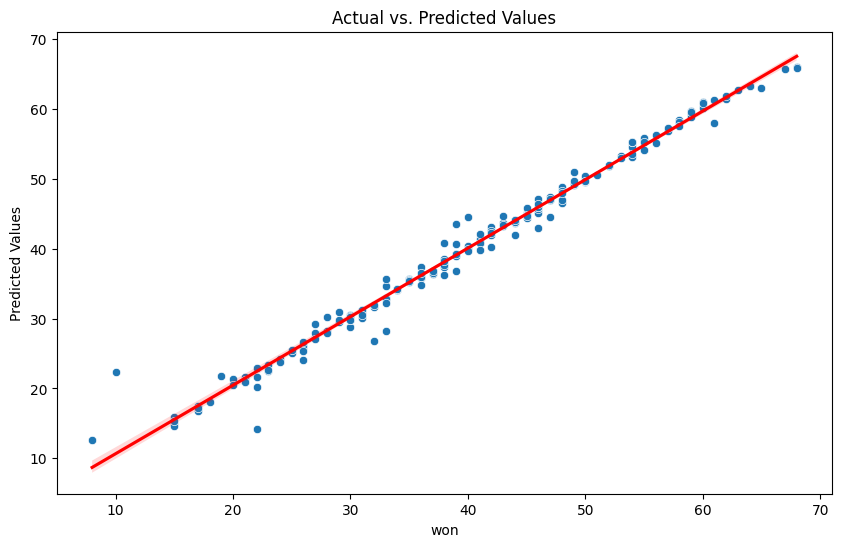

(0.9870813628052661,
 0.7226579163368376,
 1.4310479646921332,
 0.9870305612830628)

In [27]:
from catboost import CatBoostRegressor
win_model = CatBoostRegressor()
win_model.fit(X_train_win, y_train_win)
pred_win = win_model.predict(X_test_win)
evaluate_model(pred_win, y_test_win)

# Model Creation: Lost Prediction Model

Feature selection for losing model

In [28]:
# Feature selection for losing model
lost_features = ['FGA', 'PF', 'O_FGM', 'O_FTM', 'O_FTA', 'O_TReb', 'O_AST', 'O_BLK', 'O_PTS', 'won', 'FTr']
lost_model_dataframe = dataframe[lost_features]
lost_model_labels = dataframe['lost']
lost_model_dataframe.head()

,FGA,PF,O_FGM,O_FTM,O_FTA,O_TReb,O_AST,O_BLK,O_PTS,won,FTr
0,5133,1202,0,0,0,0,0,0,3900,22,0.157997
1,6309,1473,0,0,0,0,0,0,4471,39,0.148835
2,5699,1246,0,0,0,0,0,0,4308,30,0.158449
3,5843,1351,0,0,0,0,0,0,3918,20,0.157967
4,5255,1218,0,0,0,0,0,0,3840,33,0.180971


In [29]:
# Split the data
X_train_lost, X_test_lost, y_train_lost, y_test_lost = train_test_split(
    lost_model_dataframe, lost_model_labels, test_size=0.2, random_state=2
)

# XGBRegressor for predicting lost

Explained Variance Score: 0.9856066532079933
Mean Absolute Error: 0.7538483283099007
Root Mean Squared Error: 1.519562691561595
R2 Score: 0.9855952066661277


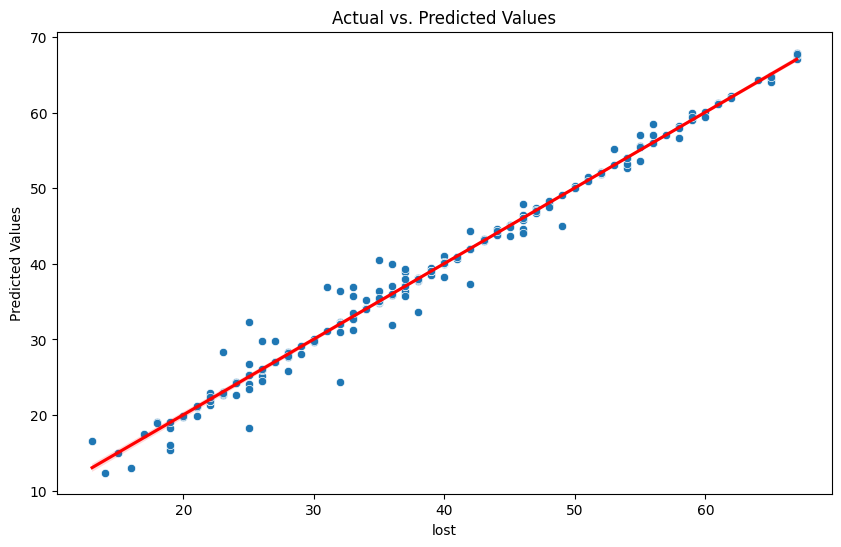

(0.9856066532079933, 0.7538483283099007, 1.519562691561595, 0.9855952066661277)

In [30]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train_lost, y_train_lost)
pred = model.predict(X_test_lost)
evaluate_model(pred, y_test_lost)

# Decision Tree Regression for predicting lost

Explained Variance Score: 0.970931492679927
Mean Absolute Error: 0.8949579831932774
Root Mean Squared Error: 2.1586254574488413
R2 Score: 0.9709313825473317


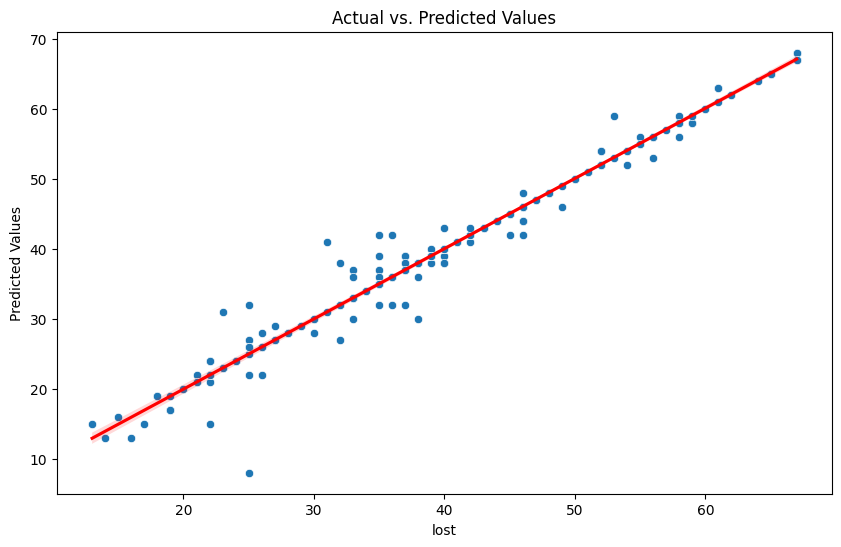

(0.970931492679927, 0.8949579831932774, 2.1586254574488413, 0.9709313825473317)

In [31]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X_train_lost, y_train_lost)
pred = model.predict(X_test_lost)
evaluate_model(pred, y_test_lost)

# Cat Boost Regressor for predicting lost

Learning rate set to 0.040606
0:	learn: 12.0227689	total: 4.4ms	remaining: 4.4s
1:	learn: 11.6610362	total: 6.09ms	remaining: 3.04s
2:	learn: 11.2995136	total: 8.97ms	remaining: 2.98s
3:	learn: 10.9552825	total: 11.3ms	remaining: 2.81s
4:	learn: 10.6264340	total: 13.4ms	remaining: 2.66s
5:	learn: 10.3313139	total: 15.7ms	remaining: 2.61s
6:	learn: 10.0328814	total: 17.9ms	remaining: 2.54s
7:	learn: 9.7482465	total: 19.5ms	remaining: 2.42s
8:	learn: 9.4777125	total: 38.7ms	remaining: 4.26s
9:	learn: 9.2159577	total: 42ms	remaining: 4.16s
10:	learn: 8.9681623	total: 45.4ms	remaining: 4.08s
11:	learn: 8.7140638	total: 54.9ms	remaining: 4.52s
12:	learn: 8.4824587	total: 58.2ms	remaining: 4.42s
13:	learn: 8.2374680	total: 61.2ms	remaining: 4.31s
14:	learn: 7.9936591	total: 74.1ms	remaining: 4.87s
15:	learn: 7.8022429	total: 77.6ms	remaining: 4.77s
16:	learn: 7.6341690	total: 81.2ms	remaining: 4.7s
17:	learn: 7.4280854	total: 84.1ms	remaining: 4.59s
18:	learn: 7.2210175	total: 85.8ms	remaini

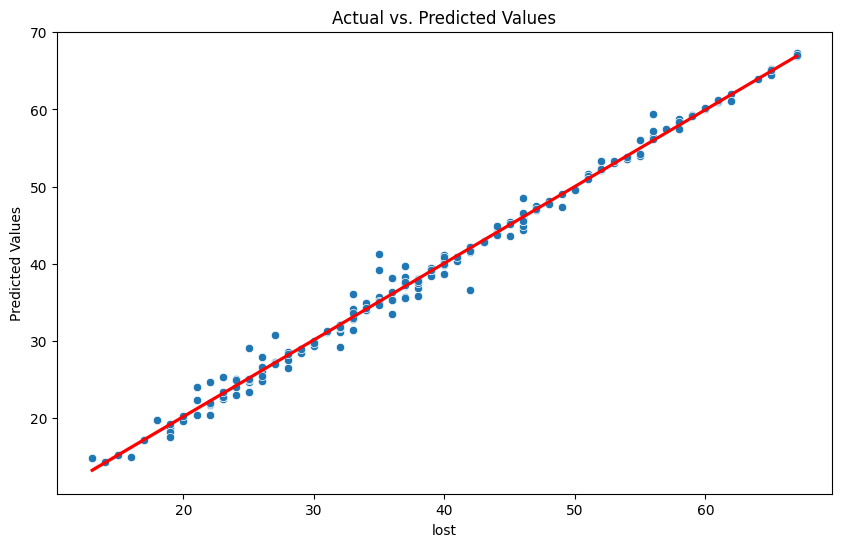

(0.9926666732855268, 0.6242042100661949, 1.088829938636566, 0.992604119335241)

In [32]:
from catboost import CatBoostRegressor
lost_model = CatBoostRegressor()
lost_model.fit(X_train_lost, y_train_lost)
pred_lost = lost_model.predict(X_test_lost)
evaluate_model(pred_lost, y_test_lost)

In [33]:
def teamList():
  file = open("/Users/macbook/Downloads/databasebasketball/teams.txt","r") 
  file.readline()
  teams = []
  id = 0
  for x in file:
    a = x.split(",")
    teams.append(a[0])

  return teams

# The average of the Teams data is used as a means to perdict the results given two teams

In [34]:
teams = teamList()

# For each team the average of FGM, FGA, FTM, FTA, TReb, AST, PTS, FT%, o_FT%, eFG%,PF, O_FGM, O_FTM, O_FTA, O_TReb, O_AST, O_BLK, FTr, won, and lost is calculated 

def createAvgDataframe(df):

  ave_df_1 = df.groupby(['Team'],as_index=False).FGM.mean() # FGM ave
  ave_df_2 = df.groupby(['Team'],as_index=False).FGA.mean() # FGA ave
  ave_df_3 = df.groupby(['Team'],as_index=False).FTM.mean() # FTM ave
  ave_df_4 = df.groupby(['Team'],as_index=False).FTA.mean() # FTA ave

  ave_df_5 = df.groupby(['Team'],as_index=False).TReb.mean() # TReb ave
  ave_df_6 = df.groupby(['Team'],as_index=False).AST.mean() # AST ave
  ave_df_7 = df.groupby(['Team'],as_index=False).PTS.mean() # PTS ave
  df.rename(columns={'FT%':'FTPer'},inplace=True)
  ave_df_8 = df.groupby(['Team'],as_index=False).FTPer.mean() # FT% ave

  df.rename(columns={'O_FT%':'oFTPer'},inplace=True)
  ave_df_9 = df.groupby(['Team'],as_index=False).oFTPer.mean() # O_FT% ave
  ave_df_10 = df.groupby(['Team'],as_index=False).PF.mean() # PF ave
  ave_df_11 = df.groupby(['Team'],as_index=False).O_FGM.mean() # O_FGM ave
  ave_df_12 = df.groupby(['Team'],as_index=False).O_FTM.mean() # O_FTM ave

  ave_df_13 = df.groupby(['Team'],as_index=False).O_FTA.mean() # O_FTA ave
  ave_df_14 = df.groupby(['Team'],as_index=False).O_TReb.mean() # O_TReb ave
  ave_df_15 = df.groupby(['Team'],as_index=False).O_AST.mean() # O_AST ave
  ave_df_16 = df.groupby(['Team'],as_index=False).O_BLK.mean() # O_BLK ave

  df.rename(columns={'eFG%':'eFGPer'},inplace=True)
  ave_df_17 = df.groupby(['Team'],as_index=False).eFGPer.mean() # eFG% ave
  ave_df_18 = df.groupby(['Team'],as_index=False).FTr.mean() # FTr ave
  ave_df_19 = df.groupby(['Team'],as_index=False).won.mean() # Won ave
  ave_df_20 = df.groupby(['Team'],as_index=False).lost.mean()  # Lost ave
  ave_df_21 = df.groupby(['Team'],as_index=False).O_PTS.mean()  # O_PTS ave

  newDf= pd.merge(ave_df_2, ave_df_3, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_4, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_5, on="Team",how="right")

  newDf= pd.merge(newDf, ave_df_6, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_7, on="Team",how="right") 

  newDf= pd.merge(newDf, ave_df_8, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_9, on="Team",how="right")    

  newDf= pd.merge(newDf, ave_df_10, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_11, on="Team",how="right")
 
  newDf= pd.merge(newDf, ave_df_12, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_13, on="Team",how="right")
 
  newDf= pd.merge(newDf, ave_df_14, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_15, on="Team",how="right")

  newDf= pd.merge(newDf, ave_df_16, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_17, on="Team",how="right")

  newDf= pd.merge(newDf, ave_df_18, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_19, on="Team",how="right")

  newDf= pd.merge(newDf, ave_df_20, on="Team",how="right")
  newDf= pd.merge(newDf, ave_df_21, on="Team",how="right")

  newDf= pd.merge(newDf, ave_df_1, on="Team",how="right")
  return newDf

ave_df = createAvgDataframe(dataframe)
ave_df.head()

,Team,FGA,FTM,FTA,TReb,AST,PTS,FTPer,oFTPer,PF,...,O_FTA,O_TReb,O_AST,O_BLK,eFGPer,FTr,won,lost,O_PTS,FGM
0,ANA,7606.000000,2141.000000,2916.000000,4158.000000,1297.000000,8704.000000,0.734225,0.703871,2174.000000,...,3100.000000,4449.000000,1308.000000,0.000000,0.431436,0.281488,25.000000,53.000000,9057.000000,3172.000000
1,AND,6254.000000,1703.000000,2343.000000,0.000000,1240.000000,5589.000000,0.726846,0.000000,1806.000000,...,0.000000,0.000000,0.000000,0.000000,0.310681,0.272306,37.000000,27.000000,5350.000000,1943.000000
2,ATL,7017.189189,1748.621622,2323.270270,3656.621622,1831.891892,8387.837838,0.752730,0.716864,1943.621622,...,2095.486486,3383.918919,1791.567568,353.216216,0.472906,0.249490,40.135135,41.000000,8407.891892,3235.189189
3,BA1,5307.428571,1502.428571,2100.571429,2052.428571,1167.142857,5128.714286,0.715625,0.000000,1710.714286,...,0.000000,0.000000,0.000000,0.000000,0.340171,0.281543,22.571429,41.714286,5362.857143,1813.142857
4,BAL,8190.800000,1985.400000,2705.900000,4962.900000,1737.700000,9256.600000,0.735564,0.223307,2010.000000,...,669.800000,1290.500000,555.800000,0.000000,0.444001,0.242416,40.100000,41.200000,9278.800000,3635.600000


# Feature selection for wining model using the average of the Teams data

In [35]:
win_features = ['FGM','FGA','FTM','FTA','TReb','AST','PTS','lost','FTPer','eFGPer']
win_df = ave_df[win_features]
win_df.rename(columns={"FTPer" : "FT%", "eFGPer" : "eFG%"}, inplace=True)
win_df.head()

/var/folders/_5/w5m2jxc92f7cmsh3s51lgqw40000gn/T/ipykernel_40020/4056356030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_df.rename(columns={"FTPer" : "FT%", "eFGPer" : "eFG%"}, inplace=True)


,FGM,FGA,FTM,FTA,TReb,AST,PTS,lost,FT%,eFG%
0,3172.000000,7606.000000,2141.000000,2916.000000,4158.000000,1297.000000,8704.000000,53.000000,0.734225,0.431436
1,1943.000000,6254.000000,1703.000000,2343.000000,0.000000,1240.000000,5589.000000,27.000000,0.726846,0.310681
2,3235.189189,7017.189189,1748.621622,2323.270270,3656.621622,1831.891892,8387.837838,41.000000,0.752730,0.472906
3,1813.142857,5307.428571,1502.428571,2100.571429,2052.428571,1167.142857,5128.714286,41.714286,0.715625,0.340171
4,3635.600000,8190.800000,1985.400000,2705.900000,4962.900000,1737.700000,9256.600000,41.200000,0.735564,0.444001


# Feature selection for losing model using the average of the Teams data

In [36]:
lost_features = ['FGA', 'PF', 'O_FGM', 'O_FTM', 'O_FTA', 'O_TReb', 'O_AST', 'O_BLK', 'O_PTS', 'won', 'FTr']
lost_df = ave_df[lost_features]
lost_df.head()

,FGA,PF,O_FGM,O_FTM,O_FTA,O_TReb,O_AST,O_BLK,O_PTS,won,FTr
0,7606.000000,2174.000000,3388.00000,2182.000000,3100.000000,4449.000000,1308.000000,0.000000,9057.000000,25.000000,0.281488
1,6254.000000,1806.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5350.000000,37.000000,0.272306
2,7017.189189,1943.621622,3069.72973,1590.324324,2095.486486,3383.918919,1791.567568,353.216216,8407.891892,40.135135,0.249490
3,5307.428571,1710.714286,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5362.857143,22.571429,0.281543
4,8190.800000,2010.000000,1071.60000,498.500000,669.800000,1290.500000,555.800000,0.000000,9278.800000,40.100000,0.242416


# User enter team number as input 

In [37]:
while True:
  team1 = input("Enter a team number between 0 and 90, both included, or X to exit: ")
  if str(team1).upper() == 'X':
    break
  while True:
    string = "Enter a team number between 0 and 90, both included, but not " + team1 + ": "
    team2 = input(string)
    if team2 != team1:
      break
  # Predict the number of wins and losses for team 1
  team1_win_pred = win_model.predict(win_df.iloc[[team1]])
  team1_lost_pred = lost_model.predict(lost_df.iloc[[team1]])

  # Calculate win-loss ratio for team 1
  team1_win_loss = team1_win_pred / (team1_win_pred + team1_lost_pred)
  
  # Predict the number of wins and losses for team 2
  team2_win_pred = win_model.predict(win_df.iloc[[team2]])
  team2_lost_pred = lost_model.predict(lost_df.iloc[[team2]])

  # Calculate win-loss ratio for team 2
  team2_win_loss = team2_win_pred / (team2_win_pred + team2_lost_pred)
  
  print("Team 1 Selected: ", ave_df.iloc[[team1]]['Team'], ".\nWin-Loss Ratio = ", team1_win_loss)
  print("Team 2 Selected: ", ave_df.iloc[[team2]]['Team'], ".\nWin-Loss Ratio = ", team2_win_loss)

  if team1_win_loss > team2_win_loss:
    print("Team 1 will win! \n")
  else: 
    print("Team 2 will win! \n")

Team 1 Selected:  45    MMT
Name: Team, dtype: object .
Win-Loss Ratio =  [0.26060399]
Team 2 Selected:  23    FLA
Name: Team, dtype: object .
Win-Loss Ratio =  [0.43518354]
Team 2 will win! 

Team 1 Selected:  76    STL
Name: Team, dtype: object .
Win-Loss Ratio =  [0.52502461]
Team 2 Selected:  89    WAT
Name: Team, dtype: object .
Win-Loss Ratio =  [0.3070125]
Team 1 will win! 

